In [1]:
import numpy as np 
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
def rbf_kernel_pca(X,gamma,n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma*mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n)+one_n.dot(K).dot(one_n)
    eigvals , eigvecs = eigh(K)
    eigvals , eigvecs = eigvals[::-1] , eigvecs[:,::-1]
    alphas = np.column_stack((eigvecs[:,i] for i in range(n_components)))
    lambdas = [eigvals[i] for i in range(n_components)]
    return alphas, lambdas


Import a new non-separable dataset and try using PCA

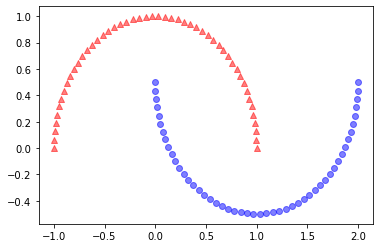

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=100 , random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
color='blue', marker='o', alpha=0.5)
plt.show()


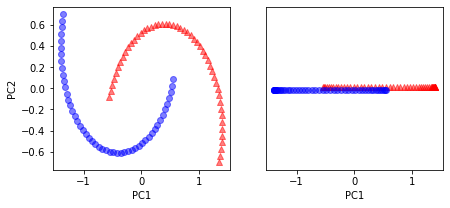

In [3]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig , ax = plt.subplots(nrows=1 , ncols=2,  figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0] , np.zeros((50,1))-0.02 , color='blue', marker='o' , alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()



<ipython-input-1-71f8206bf208>:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:,i] for i in range(n_components)))


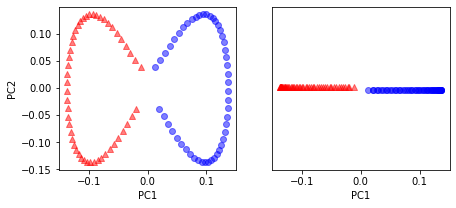

In [5]:
X_kpca, l = rbf_kernel_pca(X, gamma=15 , n_components=2)
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0] , np.zeros((50,1))-0.02 , color='blue', marker='o' , alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()


New dataset, same try

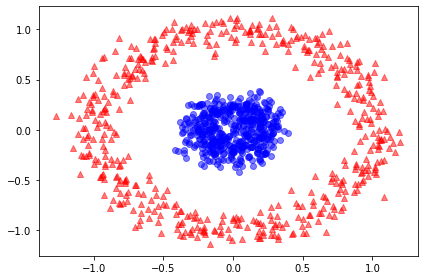

In [10]:
from sklearn.datasets import make_circles
X_circle, y_circle = make_circles(n_samples=1000,random_state=123, noise=0.1, factor=0.2)
plt.scatter(X_circle[y_circle == 0, 0], X_circle[y_circle == 0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X_circle[y_circle == 1, 0], X_circle[y_circle == 1, 1],color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()


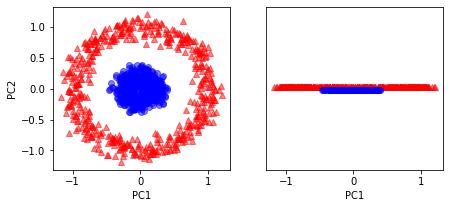

In [16]:
scikit_pca2=PCA(n_components=2)
X_spca_circle = scikit_pca2.fit_transform(X_circle)
fig2 , ax2 = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax2[0].scatter(X_spca_circle[y_circle==0, 0], X_spca_circle[y_circle==0, 1], color='red', marker='^', alpha=0.5)
ax2[0].scatter(X_spca_circle[y_circle==1, 0], X_spca_circle[y_circle==1, 1], color='blue', marker='o', alpha=0.5)
ax2[1].scatter(X_spca_circle[y_circle==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax2[1].scatter(X_spca_circle[y_circle==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax2[0].set_xlabel('PC1')
ax2[0].set_ylabel('PC2')
ax2[1].set_ylim([-1, 1])
ax2[1].set_yticks([])
ax2[1].set_xlabel('PC1')
plt.show()



<ipython-input-1-71f8206bf208>:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:,i] for i in range(n_components)))


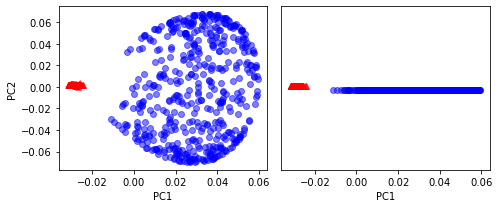

In [17]:
X_circle_kpca , l2 =rbf_kernel_pca(X_circle , gamma=15 , n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_circle_kpca[y_circle==0, 0], X_circle_kpca[y_circle==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_circle_kpca[y_circle==1, 0], X_circle_kpca[y_circle==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_circle_kpca[y_circle==0, 0], np.zeros((500,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_circle_kpca[y_circle==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
